In [1]:
import DiscreteFactors
from DiscreteFactors import *
from Graph import Graph
from BayesNet import *

import numpy as np
import pandas as pd

'''
Use
adds = 0
muls = 0
before VE
'''
'''
outcomeSpace = dict(
    A = (0,1),
    B = (0,1),
    C = (0,1),
    D = (0,1),
    E = (0,1),
)
'''
'''
data = Factor(('A','B','C','D','E'), outcomeSpace)
data.zero()
data[1,1,1,1,1] = .06384
data[0,1,1,1,1] = .01995
data = data.marginalize('A')
print(data)
'''



import DiscreteFactors
from DiscreteFactors import *
from Graph import Graph
from BayesNet import *

import numpy as np
import pandas as pd

graph = Graph({
    'L': ['S', 'V'],
    'H': ['S', 'V'],
    'S': ['O'],
    'V': ['C', 'O'],
    'O': ['B'],
    'A': ['T'],
    'T': ['B'],
    'C': [],
    'B': [],
})
# Define outcome space of each random variable
outcomeSpace = dict(
    H=(0,1),
    L=(0,1),
    A=(0,1),
    V=(0,1),
    S=(0,1),
    T=(0,1),
    C=(0,1,2),
    O=(0,1,2),
    B=(0,1,2),
)
# Initialize Bayesian Network object
ICU_Net = BayesNet(graph, outcomeSpace)

# Add each factor one by one to the ICU_Net object
h = Factor(('H',), outcomeSpace)
h[0] = 0.8
h[1] = 0.2
ICU_Net.factors['H'] = h

v = Factor(('L', 'H', 'V'), outcomeSpace)
v[0, 0, 0] = 0.05
v[0, 0, 1] = 0.95
v[0, 1, 0] = 0.99
v[0, 1, 1] = 0.01
v[1, 0, 0] = 0
v[1, 0, 1] = 1
v[1, 1, 0] = 1
v[1, 1, 1] = 0
ICU_Net.factors['V'] = v

c = Factor(('V', 'C'), outcomeSpace)
c[0, 0] = 0.94
c[0, 1] = 0.04
c[0, 2] = 0.02
c[1, 0] = 0.02
c[1, 1] = 0.26
c[1, 2] = 0.72
ICU_Net.factors['C'] = c

l = Factor(('L',), outcomeSpace)
l[0] = 0.95
l[1] = 0.05
ICU_Net.factors['L'] = l

s = Factor(('L','H','S'), outcomeSpace)
s[0, 0, 0] = 0.04
s[0, 0, 1] = 0.96
s[0, 1, 0] = 0.48
s[0, 1, 1] = 0.52
s[1, 0, 0] = 0.95
s[1, 0, 1] = 0.05
s[1, 1, 0] = 0
s[1, 1, 1] = 1
ICU_Net.factors['S'] = s

o = Factor(('S', 'V', 'O'), outcomeSpace)
o[0, 0, 0] = 0.97
o[0, 0, 1] = 0.01
o[0, 0, 2] = 0.02
o[0, 1, 0] = 0.78
o[0, 1, 1] = 0.19
o[0, 1, 2] = 0.03
o[1, 0, 0] = 0.22
o[1, 0, 1] = 0.76
o[1, 0, 2] = 0.02
o[1, 1, 0] = 0.01
o[1, 1, 1] = 0.01
o[1, 1, 2] = 0.98  
ICU_Net.factors['O'] = o

t = Factor(('A','T'), outcomeSpace)
t[0, 0] = 0.30
t[0, 1] = 0.70
t[1, 0] = 1
t[1, 1] = 0
ICU_Net.factors['T'] = t

b = Factor(('O', 'T', 'B'), outcomeSpace)
b[0, 0, 0] = 1
b[0, 0, 1] = 0
b[0, 0, 2] = 0
b[0, 1, 0] = 0.30
b[0, 1, 1] = 0.62
b[0, 1, 2] = 0.08
b[1, 0, 0] = 0.93
b[1, 0, 1] = 0.07
b[1, 0, 2] = 0
b[1, 1, 0] = 0.02
b[1, 1, 1] = 0.49
b[1, 1, 2] = 0.49
b[2, 0, 0] = 0.90
b[2, 0, 1] = 0.08
b[2, 0, 2] = 0.02
b[2, 1, 0] = 0.01
b[2, 1, 1] = 0.08
b[2, 1, 2] = 0.91 
ICU_Net.factors['B'] = b

a = Factor(('A',), outcomeSpace)
a[0] = 0.99
a[1] = 0.01
ICU_Net.factors['A'] = a

#order = ICU_Net.minDegree()
#print(ICU_Net.width(order[:-1]))
#print(ICU_Net.VE(order[:-1]))


# reinitialise ICU_net so that it has interactionGraph function
ICU_Net = BayesNet(ICU_Net.graph, ICU_Net.outcomeSpace, ICU_Net.factors)
pos = {
    'B': '1,0!',
    'O': '0,1!',
    'C': '1,1!', 
    'T': '2,1!',
    'S': '0,2!',
    'V': '1,2!',
    'A': '2,2!',
    'L': '0,3!',
    'H': '1,3!',
}
ig = ICU_Net.interactionGraph()
order = ICU_Net.minDegree()
print(order)
print(ICU_Net.width(order[:-1]))
print(ICU_Net.VE(order[:-1]))
print(ICU_Net.bucketVE(order[:-1]))
print(ICU_Net.query(['B'],A=0))
print(ICU_Net.query_b(['B'],A=0))


['C', 'A', 'T', 'B', 'O', 'H', 'V', 'L', 'S']
3
╒═════╤════════╕
│   S │     Pr │
╞═════╪════════╡
│   0 │ 0.1596 │
├─────┼────────┤
│   1 │ 0.8404 │
╘═════╧════════╛

╒═════╤════════╕
│   S │     Pr │
╞═════╪════════╡
│   0 │ 0.1596 │
├─────┼────────┤
│   1 │ 0.8404 │
╘═════╧════════╛

╒═════╤══════════╕
│   B │       Pr │
╞═════╪══════════╡
│   0 │ 0.321175 │
├─────┼──────────┤
│   1 │ 0.180985 │
├─────┼──────────┤
│   2 │ 0.49784  │
╘═════╧══════════╛

╒═════╤══════════╕
│   B │       Pr │
╞═════╪══════════╡
│   0 │ 0.321175 │
├─────┼──────────┤
│   1 │ 0.180985 │
├─────┼──────────┤
│   2 │ 0.49784  │
╘═════╧══════════╛



# Markov Network

Iteration:
29


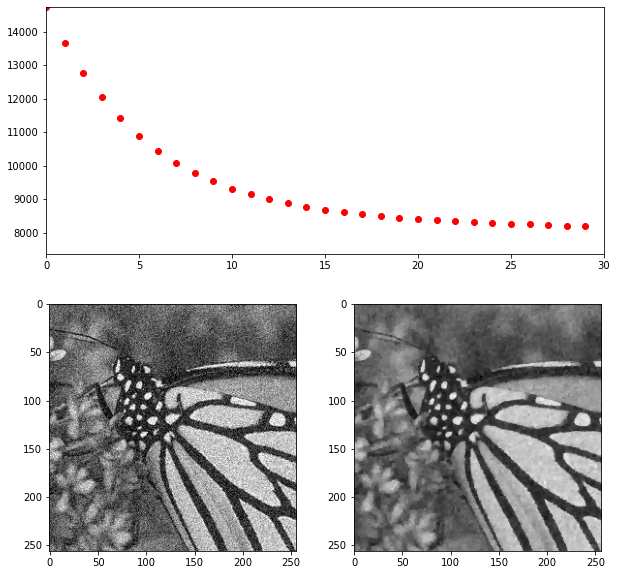

In [2]:
from MarkovNetwork import *
img_noisy=mpimg.imread('img/05_25_noisy.png')
plt.imshow(img_noisy, cmap='gray')
(size_x, size_y) = img_noisy.shape
print("Image size:")
print(size_x, "x", size_y)

stochastic_search(img_noisy, max_iter=30)